# Aircraft Safety Analysis

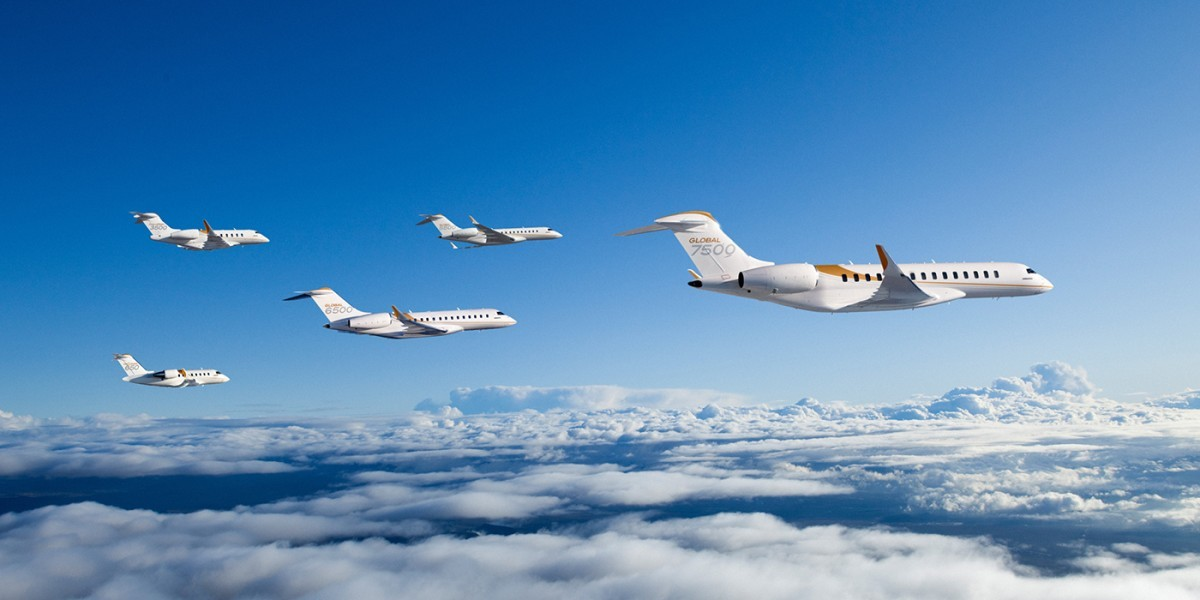

## Introduction:

Aviation safety is a crucial consideration for the industry and the public. Understanding the factors contributing to aviation accidents can lead to more effective regulations, training procedures, and safety protocols, ultimately saving lives. In this project, we delve deep into the aviation accident data to uncover patterns, trends, and potential areas of improvement. 

## Business Problem:

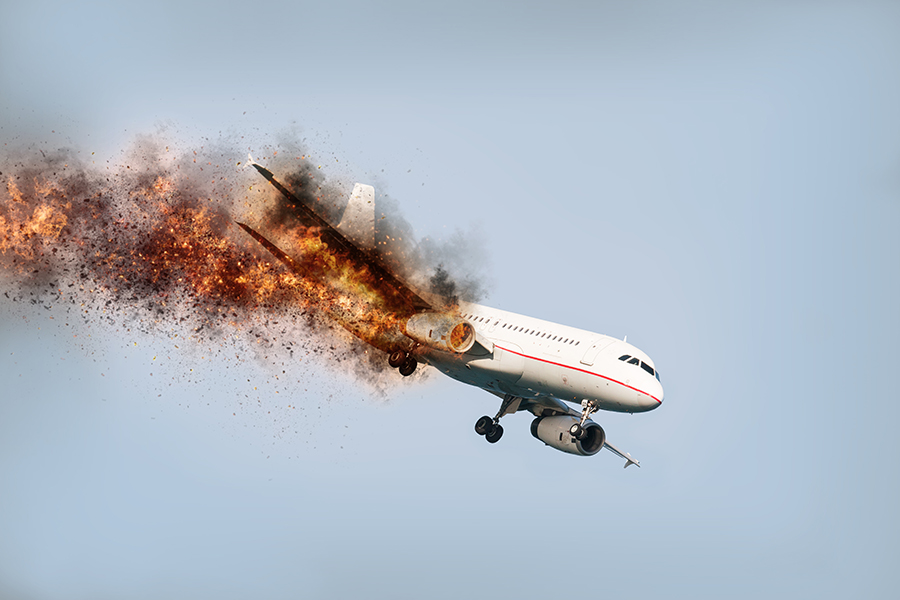

The primary goal of this analysis is to gain insights into causes and consequences of aviation accidents as our company expands into commercial and private aviation. Before we do so, it's essential to understand the risks associated with aviation so we can select the safest aircraft for our new endeavors. Specifically, I aim to answer:

1. Are certain sectors of aviation more prone to accidents or incidents?
2. Does the type of aircraft or engine play a role in the frequency or severity of accidents?
3. Are there specific regions or countries with higher accident rates? 

To answer these questions, I'll be working with a comprehensive dataset that contains detailed information about aviation accidents including location, aircraft details, and the resulting injuries or fatalities. 

## Data:

1. `AviationData.csv`: This is our primary dataset which encompasses aviation accident data spanning from 1962 - 2023. This is provided from the National Trasportation Safety Board and encompasses various attributes related to each aviation accident such as location, injury severity, and engine type, among others.  
2. `aircraft_data.csv`: Sourced from Kaggle, this Aircraft Pricing Dataset is an exhaustive catalogue detailing various aircraft attributes including production rates. 
3. `world_population.csv`: Another dataset sourced from Kaggle, this provides populations by country. 

## Methodology:

1. **Data Cleaning**: My intial step involves processing the data, addressing missing values, and ensuring the data is formatted correctly for our analysis. 
2. **Exploratory Data Analysis (EDA)**: Through visualizations and statistical analyses, I'll uncover the primary trends and patterns in the data.
4. **Conclusions**: Based on my analyses, I'll draw conclusions and provide recommendations for enhancing aviation safety.

## Anticipated Challenges:

Given the vast timeline of the dataset, spanning multiple decades, I anticipate encountering evolving aviation standards and practices, which could influence accident trends. Additionally, variations in data reporting standards over time might pose challenges in consistent analysis. I plan to address these challenges by segmenting our analysis into time periods or focusing on more recent data to ensure relevance to current aviation practices.

## Data Understanding

In [1118]:
cd data

[WinError 2] The system cannot find the file specified: 'data'
C:\Users\emmam\Documents\Flatiron\air-safety-analytics\data


In [1119]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

aviation_df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)
world_pop = pd.read_csv('world_population.csv')
production_data = pd.read_csv('aircraft_data.csv')

In [1120]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [1121]:
world_pop.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [1122]:
production_data.head()

,Unnamed: 0,aircraft,nbBuilt,startDate,endDate,retired
0,0,Gotha G.III,25,1916,1916.0,NaN
1,1,Macchi C.205,262,1942,1944.0,1950
2,2,Antonov An-30,123,1971,1980.0,NaN
3,3,Blohm & Voss Ha 137,6,1935,1937.0,NaN
4,4,Panavia Tornado,992,1979,1998.0,NaN


## Data Preparation

In [1123]:
def replace_punctuation_with_space(column):
    return column.str.replace(r'[_\W]+', ' ').str.title()

aviation_df.columns = replace_punctuation_with_space(aviation_df.columns)

aviation_df.columns

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

In [1124]:
aviation_df['Event Date'].dtypes

dtype('O')

In [1125]:
# Converting 'Event.Date' to datetime format for future plotting
aviation_df['Event Date'] = pd.to_datetime(aviation_df['Event Date'])
aviation_df.columns

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

In [1126]:
# Dropping duplicates matching on 'Event.Id'
aviation_df.drop_duplicates(subset='Event Id', keep='first', inplace=True)
# Re-run same code as above to check for duplicates
duplicates = aviation_df[aviation_df.duplicated(['Event Id'])]
duplicates

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date


In [1127]:
aviation_df.isnull().sum()

Event Id                      0
Investigation Type            0
Accident Number               0
Event Date                    0
Location                     52
Country                     222
Latitude                  53739
Longitude                 53748
Airport Code              38350
Airport Name              35834
Injury Severity             990
Aircraft Damage            3103
Aircraft Category         55770
Registration Number        1285
Make                         63
Model                        92
Amateur Built               100
Number Of Engines          6027
Engine Type                7024
Far Description           56036
Schedule                  75591
Purpose Of Flight          6122
Air Carrier               71418
Total Fatal Injuries      11267
Total Serious Injuries    12322
Total Minor Injuries      11760
Total Uninjured            5863
Weather Condition          4473
Broad Phase Of Flight     27114
Report Status              6361
Publication Date          13599
dtype: i

There are numerous columns with a significant amount of missing values. Instead of treating each column individually, I've chosen to drop columns with more than 40% missing values (or less than 60% non-missing values). While I could impute these missing values, doing so for columns with such a high percentage of missing data can introduce significant bias to the dataset. 

In [1128]:
aviation_df.dropna(thresh=aviation_df.shape[0]*0.6, axis=1, inplace=True)
aviation_df.isnull().sum()

Event Id                      0
Investigation Type            0
Accident Number               0
Event Date                    0
Location                     52
Country                     222
Injury Severity             990
Aircraft Damage            3103
Registration Number        1285
Make                         63
Model                        92
Amateur Built               100
Number Of Engines          6027
Engine Type                7024
Purpose Of Flight          6122
Total Fatal Injuries      11267
Total Serious Injuries    12322
Total Minor Injuries      11760
Total Uninjured            5863
Weather Condition          4473
Broad Phase Of Flight     27114
Report Status              6361
Publication Date          13599
dtype: int64

I used the .dropna method to remove certain columns from aviation_df. Here's a breakdown:

- The **thresh** parameter is set to 60% of the total rows. This means we're keeping columns that have at least 60% non-missing values.
- **how='all'** ensures that we only drop columns if all their values are missing, but this is overridden by the thresh parameter.
- **axis=1** confirms we're working with columns, not rows.
- **inplace=True** modifies our original dataframe directly instead of creating a new copy.


Columns removed based on criteria set in the code:
- `Latitude`
- `Longitude`
- `Airport.Code`
- `Airport.Name`
- `Aircraft.Category`
- `FAR.Description`
- `Schedule`
- `Air.carrier`

In [1129]:
aviation_df['Aircraft Damage'].value_counts()

Substantial    63641
Destroyed      18402
Minor           2686
Unknown          119
Name: Aircraft Damage, dtype: int64

In [1130]:
aviation_df['Aircraft Damage'] = aviation_df['Aircraft Damage'].fillna('Minor')
aviation_df['Aircraft Damage'] = aviation_df['Aircraft Damage'].replace('Unknown', 'Minor')

aviation_df['Report Status'].unique()

array(['Probable Cause', 'Factual', 'Foreign', ...,
       'The pilot did not ensure adequate clearance from construction vehicles during taxi.',
       'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.',
       'The pilot\x92s loss of control due to a wind gust during landing.'],
      dtype=object)

Upon examining the unique values in the `Report.Status` column, it's evident that some entries are lengthy narratives, making them unsuitable for concise analysis or visualization. Such detailed descriptions aren't ideal for aggregate analysis. While values like 'Probable Cause', 'Factual', and 'Foreign' seem relevant, the longer descriptive sentences can be considered as 'noise' in this dataset. With over 4,600 unique entries, many of which are lengthy narratives, the column remains cluttered. Given that this column isn't critical for our core analysis, it's more efficient to drop it entirely rather than investing more time in trying to refine its values.

In [1131]:
aviation_df.drop('Report Status', axis=1, inplace=True)
aviation_df.isna().sum()

Event Id                      0
Investigation Type            0
Accident Number               0
Event Date                    0
Location                     52
Country                     222
Injury Severity             990
Aircraft Damage               0
Registration Number        1285
Make                         63
Model                        92
Amateur Built               100
Number Of Engines          6027
Engine Type                7024
Purpose Of Flight          6122
Total Fatal Injuries      11267
Total Serious Injuries    12322
Total Minor Injuries      11760
Total Uninjured            5863
Weather Condition          4473
Broad Phase Of Flight     27114
Publication Date          13599
dtype: int64

In [1132]:
aviation_df['Injury Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [1133]:
fatal_injuries = aviation_df[aviation_df['Injury Severity'].str.contains('Fatal\(\d+\)', na=False)]

fatal_injuries

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Injury Severity,Aircraft Damage,Registration Number,Make,...,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Publication Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63902,20080117X00071,Accident,LAX08WA045,2007-12-29,"WESTGATE BRIDGE, AUSTRALIA",Australia,Fatal(1),Substantial,NaN,Robinson,...,NaN,NaN,Instructional,1.0,1.0,NaN,NaN,VMC,NaN,17-01-2008
63906,20080103X00010,Accident,DFW08LA052,2007-12-29,"Crowley, TX",United States,Fatal(2),Destroyed,N136DG,Althouse,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,Maneuvering,03-12-2008
63907,20071231X02014,Accident,DFW08FA053,2007-12-29,"Venice, LA",United States,Fatal(1),Destroyed,N211EL,Bell,...,1.0,Turbo Shaft,NaN,1.0,1.0,2.0,NaN,IMC,Approach,15-07-2009
63908,20080109X00032,Accident,NYC08FA071,2007-12-30,"CHEROKEE, AL",United States,Fatal(3),Substantial,N109AE,Bell,...,1.0,Turbo Shaft,Other Work Use,3.0,0.0,0.0,0.0,VMC,Maneuvering,15-01-2009


From a quick glance at the unique values in the dataset, it's evident that the number in the parentheses corresponds to the number in `Total.Fatal.Injuries`, making `Injury Severity` redundant. 

In [1134]:
aviation_df.drop('Injury Severity', axis=1, inplace=True)

In [1135]:
aviation_df.isnull().sum()

Event Id                      0
Investigation Type            0
Accident Number               0
Event Date                    0
Location                     52
Country                     222
Aircraft Damage               0
Registration Number        1285
Make                         63
Model                        92
Amateur Built               100
Number Of Engines          6027
Engine Type                7024
Purpose Of Flight          6122
Total Fatal Injuries      11267
Total Serious Injuries    12322
Total Minor Injuries      11760
Total Uninjured            5863
Weather Condition          4473
Broad Phase Of Flight     27114
Publication Date          13599
dtype: int64

Given the minimal missing values in the `Location` column relative to our dataset's size, I'll drop rows lacking this information. I'll impliment the same strategy for `Make`, `Model`, and `Amateur.Built` as they're 'NaN' values are similarly small. 

In [1136]:
aviation_df.dropna(subset=['Location'], inplace=True)
aviation_df.dropna(subset=['Make'], inplace=True)
aviation_df.dropna(subset=['Model'], inplace=True)

Next, we'll address our other Injuries columns:

- `Total.Fatal.Injuries`
- `Total.Serious.Injuries`
- `Total.Minor.Injuries`
- `Total.Uninjured`

Our first step is to examine the most commonly occuring value:

In [1190]:
aviation_df[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].mode()

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
0,0.0,0.0,0.0,0.0


The mode for each of the injury-related columns — `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, and `Total.Uninjured` — is 0.0. This indicates that the most common occurrence for each type of injury is zero. In other words, the majority of incidents in the dataset did not result in any fatalities, serious injuries, or minor injuries.

Given this, it's fair to proceed with 0 imputation for 'NaN' values which we'll do with a `for` loop: 

In [1138]:
columns_to_impute = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']

# For each column in the list 'columns_to_impute' replace missing values with 0
for col in columns_to_impute:
    aviation_df[col].fillna(0, inplace=True)
    
aviation_df[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].describe()

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
count,87787.000000,87787.000000,87787.000000,87787.000000
mean,0.550788,0.241232,0.308679,4.737968
std,4.950094,1.440939,2.088472,25.734475
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


This dataset exhibits considerable variability as shown by the standard deviations. Nevertheless, these outliers are potentially significant for my analysis, so I have decided to include them in the analysis of the Injuries columns.

In [1139]:
# Count the occurrences of each unique value in the 'Country' column of the aviation_df DataFrame.
# This will give us a series where the index is the country name and the value is the count of occurrences.
aviation_df['Country'].value_counts()

# From the aviation_df DataFrame, select rows where the 'Country' field is missing (null).
# Then, from those selected rows, extract the 'Location' column.
# This gives me a Series of locations that have a missing country.
missing_country_locations = aviation_df[aviation_df['Country'].isnull()]['Location']

missing_country_locations.unique()

array(['SAINT CROIX', 'HUMA CAO', 'MUSTANG BLK A11', 'MOCA',
       'WEST DELTA 105D', 'WEST CAMERON #4', 'CHARLOTTE AMALI',
       'NEAR ST. CROIX', 'BUCCANEER OIL F', 'NEAR RAMEY', 'CULEBRA',
       'GRAND ISLE B43Q', 'PATILLAS', 'E. CAMERON', 'SHIPSHOAL 295',
       'LAJAS', 'CABO ROJO', 'EUGENE ISL.BLK', 'VIEQUES', 'EUGENE ISLAND',
       'GRAND ISLE BLK', 'ST. THOMAS', 'MANATI', 'DORADO', 'QUEBRADILLAS',
       'GREEN CANYON172', 'STAKE ISLAND', 'CULEBRA ISLAND',
       'VERMILLION 255B', 'GUAYAMA', 'W CAMRN BLK 624', 'W CAMERON 540',
       'SOUTH PELTO', 'LOIZA', 'E BRAKE BLK 397', 'ST. CROIX',
       'OCEAN CAY', 'PONCE', 'SHIP SHOAL 241', 'WEST DELTA 105',
       'ST.THOMAS', 'E CAMERON BLK 2', 'SHIP SHOAL BLK', 'SOUTH MARSH',
       'NORTH PADRE 967', 'EAST CAMERON', 'GRAND ISLE BL73',
       'LAS PIEDRAS', 'SANTO DOMINGO', 'VEGA BAJA', 'ISLA VERDE',
       'GRAND ISLE', 'MUSTANG ISLAND', 'ISABELA', 'NARANJITO',
       'MATAGORDA 665', 'NO.ATLANTIC OC', 'PONCH', 'MAYAGUEZ',
 

In [1140]:
# Setting the 'Country' column to "Int'l Waters" for rows where the 'Location' is "int'l waters"
aviation_df.loc[aviation_df['Location'] == "int'l waters", "Country"] = "Int'l Waters"

aviation_df['Location'] = aviation_df['Location'].str.upper()

aviation_df.dropna(subset=['Country'], inplace=True)

In [1141]:
aviation_df['Engine Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [1142]:
# Standardizing 'Unkown' and 'None' values
aviation_df['Engine Type'] = aviation_df['Engine Type'].replace('UNK', 'Unknown')
aviation_df['Engine Type'] = aviation_df['Engine Type'].replace('NONE', 'None')

aviation_df['Engine Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR'], dtype=object)

In [1143]:
aviation_df['Engine Type'].isna().sum()

6942

For the `Engine.Type` column, our imputation strategy needs to be more nuanced and data-driven. Given the diverse range of aircraft makes and models, it's not appropriate to apply a generic fill for missing engine types. Instead, I leverage the data itself to inform our imputation.

The steps are as follows:

1. **Grouping by Aircraft Make and Model**:
My dataset contains various makes and models of aircraft, and each of these combinations might have a specific engine type that's most commonly associated with it. So, the first step is to group the data by the Make_Model column. This allows me to examine each unique make and model individually.


2. **Calculating the Mode of Engine.Type for Each Group**:
Within each group (each unique Make_Model), I calculate the mode of the `Engine.Type` column. The mode represents the most frequently occurring engine type for that specific make and model.


3. **Handling Ambiguities**:
It's possible that, for some aircraft models, there isn't a clear most frequent engine type. In such cases, where the mode might be empty, I return a np.nan to signify that there's no clear common engine type.


4. **Mapping Make and Model to Engine Type**:
The output from the above steps is a Series that pairs each `Make_Model` with its most common `Engine.Type`. To make this output more usable for imputation, I convert it into a dictionary using the .to_dict() method. This dictionary, named engine_mapping, effectively becomes our reference for filling missing engine types.

In essence, this approach ensures that my imputation for `Engine.Type` is grounded in the data itself. Instead of making broad assumptions, I'm using the relationships inherent in the dataset to guide our imputation. 

Before we start grouping, however, I will create a separate column that consolidates Make and Model details to ensure my imputation is accurate. 

In [1144]:
aviation_df.loc[:, 'Make'] = aviation_df['Make'].str.strip().str.title()

In [1145]:
aviation_df['Make Model'] = aviation_df['Make'] + ' ' + aviation_df['Model']

def fill_missing_with_mode(df, group_col, target_col):
    """
    Fill missing values in the target column based on the mode of the group column.

    Parameters:
    df: DataFrame to operate on.
    group_col: Column name to group by.
    target_col: Column name where missing values are to be filled.

    Returns:
    DataFrame with missing values filled.
    """
    # Create a mapping based on the mode of the target column grouped by the group column
    mode_mapping = df.groupby(group_col)[target_col].apply(
        lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()

    # Fill missing values in the target column based on the mapping
    df.loc[df[target_col].isna(), target_col] = df[df[target_col].isna()].apply(
        lambda row: mode_mapping[row[group_col]] if row[group_col] in mode_mapping else row[target_col], 
        axis=1
    )
    
    return df

aviation_df = fill_missing_with_mode(aviation_df, 'Make Model', 'Engine Type')
aviation_df['Engine Type'].isna().sum()

1731

In [1146]:
unknown_engine = aviation_df[aviation_df['Engine Type'].isin(['Unknown'])]
unknown_engine[['Make Model', 'Engine Type']].head()

,Make Model,Engine Type
62,Schleicher ASW 20,Unknown
247,Raven S-55A,Unknown
353,Balloon Works FIREFLY,Unknown
433,Barnes FIREFLY-7,Unknown
436,Barnes BALLOON AX7,Unknown


The `Make_Model` and `Engine.Type` columns provide crucial information about the type of aircraft and its engine, respectively. Accurate and complete information in these columns is essential for any analysis that relates aircraft characteristics to safety metrics.

**Schleicher ASW 20**: This model is a glider. Gliders, by definition, do not have engines. Thus, while the "Unknown" label for its Engine.Type might technically be correct (since it doesn't have an engine), it can be misleading in the context of the dataset. It would be more accurate to label it as "None" or exclude it to avoid misinterpretations.

**Balloons (Raven S-55A, Balloon Works FIREFLY, Barnes FIREFLY-7, Barnes BALLOON AX7)**: Hot air balloons operate quite differently than conventional aircraft as they don't have engines in the traditional sense. Labeling their `Engine.Type` as "Unknown" can again be misleading. It might be more appropriate to label them as "Burner" or something similar, but such granularity is not needed for this analysis.

By excluding these entries, I ensure that the dataset remains consistent and reduces the potential for misinterpretation during analysis.

In [1147]:
aviation_df = aviation_df[aviation_df['Engine Type'] != 'Unknown']

Even after eliminating the 'Unknown' entries for 'Engine.Type', we still have to deal with NaN values. Given that 'Unknown' has already been used as a placeholder, I'll continue with this approach and fill in the NaNs with 'Unknown' to maintain consistency.

In [1148]:
nan_engine = aviation_df[aviation_df['Engine Type'].isin([np.nan])]
nan_engine

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Aircraft Damage,Registration Number,Make,Model,...,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Publication Date,Make Model
40881,20020124X00116,Accident,DCA97WA007B,1996-11-12,"NEW DELHI, INDIA",India,Minor,NaN,Tupolev,TU-154,...,NaN,NaN,349.0,0.0,0.0,0.0,NaN,NaN,24-01-2002,Tupolev TU-154
40977,20010711X01370,Incident,DCA97WA013,1996-12-05,"HONG KONG, UNITED KINGDOM",United Kingdom,Minor,NaN,Boeing,747-236F,...,NaN,NaN,0.0,0.0,0.0,3.0,NaN,NaN,12-07-2001,Boeing 747-236F
41209,20010711X01372,Accident,DCA97WA023,1997-02-01,"FORT DU FRANCE, WEST INDIES",West Indies,Minor,NaN,Boeing,DC-10-30,...,NaN,NaN,0.0,1.0,15.0,3.0,NaN,NaN,12-07-2001,Boeing DC-10-30
46411,20001212X19108,Accident,NYC99WA206B,1999-06-22,"GROSSENHAIN, GERMANY",Germany,Substantial,NaN,Zlin,Z-42M,...,NaN,Unknown,4.0,0.0,0.0,0.0,NaN,NaN,09-05-2008,Zlin Z-42M
47463,20010711X01381,Incident,DCA00WA011,1999-11-12,"MALMO, SWEDEN",Sweden,Minor,NaN,British Aerospace,BAe-146,...,NaN,NaN,0.0,0.0,0.0,72.0,NaN,NaN,11-07-2001,British Aerospace BAe-146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88847,20221206106421,Accident,ERA23LA080,2022-12-05,"WOODSFIELD, OH",United States,Substantial,N257ED,James R Dernovsek,KITFOX S5,...,NaN,Personal,0.0,0.0,0.0,1.0,NaN,NaN,07-12-2022,James R Dernovsek KITFOX S5
88848,20221206106422,Accident,CEN23LA061,2022-12-05,"ST. LOUIS, MO",United States,Substantial,N602TG,Orlican S R O,M-8 EAGLE,...,NaN,Personal,0.0,2.0,0.0,0.0,VMC,NaN,08-12-2022,Orlican S R O M-8 EAGLE
88867,20221213106456,Accident,WPR23LA066,2022-12-12,"REDDING, CA",United States,Substantial,N415RX,Airbus Helicopters,EC 130 T2,...,NaN,Business,0.0,1.0,0.0,0.0,NaN,NaN,27-12-2022,Airbus Helicopters EC 130 T2
88878,20221227106496,Accident,WPR23LA074,2022-12-17,"COTTONWOOD, CA",United States,Minor,N9YA,Royse Ralph L,GLASAIR,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,27-12-2022,Royse Ralph L GLASAIR


In [1149]:
aviation_df['Engine Type'].fillna('Unknown', inplace=True)

`Number.of.Engines` is another column that is likely to contain important data for our analysis so I'll employ the same impuation strategy implemented for `Engine.Type`. 

In [1151]:
aviation_df['Number Of Engines'].isna().sum()

4624

In [1152]:
aviation_df = fill_missing_with_mode(aviation_df, 'Make Model', 'Number Of Engines')
aviation_df['Number Of Engines'].isna().sum()

1042

In [1153]:
aviation_df.dropna(subset=['Number Of Engines'], inplace=True)

aviation_df['Number Of Engines'].isna().sum()

0

In [1154]:
aviation_df['Investigation Type'].unique()

array(['Accident', 'Incident'], dtype=object)

Upon reviewing the columns, it becomes evident that the dataset includes some extraneous details. Notably:

1. `Investigation.Type`: This columnn clarifies whether the crash resulted in bodily harm ('accident') or not ('incident'). Considering we have our injuries columns containing more detailed information, this column is redundant. 

2. `Accident.Number`, `Registration.Number`: These columns are irrelevant to our analysis. 

3. `Publication.Date`: We already have a complete `Event.Date` column which provides a timestamp for each accident/incident, rendering `Publication.Date` irrelevant to our examination. 

In [1155]:
aviation_df.drop('Investigation Type', axis=1, inplace=True)
aviation_df.drop('Accident Number', axis=1, inplace=True)
aviation_df.drop('Registration Number', axis=1, inplace=True)
aviation_df.drop('Publication Date', axis=1, inplace=True)
aviation_df.drop('Weather Condition', axis=1, inplace=True)
aviation_df.drop('Broad Phase Of Flight', axis=1, inplace=True)
aviation_df.drop('Purpose Of Flight', axis=1, inplace=True)
aviation_df.columns

Index(['Event Id', 'Event Date', 'Location', 'Country', 'Aircraft Damage',
       'Make', 'Model', 'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Make Model'],
      dtype='object')

For the purpose of this analysis, I will exclude amateur-built aircraft from the dataset. Since our focus is on identifying the safest aircraft for commercial and private use, amateur-built models fall outside the scope of our investigation.

In [1156]:
aviation_df = aviation_df[aviation_df['Amateur Built'] != 'Yes']
aviation_df.drop('Amateur Built', axis=1, inplace=True)

Now that I've taken care of null values and cleaned up our columns, I'll move on to checking for duplicates and formatting values. 

To maintain data integrity, I still need to verify that the formatting accross all columns is accurate according to my needs. Given that this data was collected over a span of 61 years, there's likely inconsistencies in how data was recorded. Country names have also changed over time so we will need to standardize these to eliminate redundancy. 

In [1157]:
aviation_df['Country'].unique()

array(['United States', 'GULF OF MEXICO', 'Puerto Rico', 'ATLANTIC OCEAN',
       'HIGH ISLAND', 'Bahamas', 'MISSING', 'Angola',
       'Korea, Republic Of', 'American Samoa', 'PACIFIC OCEAN', 'Canada',
       'Bolivia', 'Mexico', 'Dominica', 'Netherlands Antilles', 'Iceland',
       'Guam', 'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'El Salvador', 'Guyana', 'Costa Rica', 'United Kingdom',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Suriname', 'Honduras', 'Guatemala',
       'Belize', 'Papua New Guinea', 'Dominican Republic',
       'British Virgin Islands', 'Panama', 'Senegal', 'BLOCK 651A',
       'France', 'Mauritius', 'Aruba', 'Saudi Arabia', 'Cuba',
       'French Guiana', 'Germany', 'Congo', 'Jamaica',
       'Federated States Of Micronesia', 'Nicaragua', 'Haiti',
       'Marshall Islands', 'Ecuador', 'Poland', 'Colombia',
       'Trinidad And Tob

In [1158]:
aviation_df['Country'].replace(['Great Britain', 'Scotland'], 'United Kingdom', inplace=True)
aviation_df['Country'].replace(['GULF OF MEXICO', 'ATLANTIC OCEAN', 'PACIFIC OCEAN', 'Pacific Ocean', "Int'l Waters"], 
                               'International Waters', inplace=True)
aviation_df['Country'].replace('Puerto Rico', 'United States', inplace=True)
aviation_df['Country'].replace('Korea, Replublic Of', 'South Korea', inplace=True)
aviation_df['Country'].unique()

array(['United States', 'International Waters', 'HIGH ISLAND', 'Bahamas',
       'MISSING', 'Angola', 'Korea, Republic Of', 'American Samoa',
       'Canada', 'Bolivia', 'Mexico', 'Dominica', 'Netherlands Antilles',
       'Iceland', 'Guam', 'Australia', 'CARIBBEAN SEA', 'West Indies',
       'Japan', 'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'El Salvador', 'Guyana', 'Costa Rica', 'United Kingdom',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Suriname', 'Honduras', 'Guatemala',
       'Belize', 'Papua New Guinea', 'Dominican Republic',
       'British Virgin Islands', 'Panama', 'Senegal', 'BLOCK 651A',
       'France', 'Mauritius', 'Aruba', 'Saudi Arabia', 'Cuba',
       'French Guiana', 'Germany', 'Congo', 'Jamaica',
       'Federated States Of Micronesia', 'Nicaragua', 'Haiti',
       'Marshall Islands', 'Ecuador', 'Poland', 'Colombia',
       'Trinidad And Tobago', 'Austria', 'Netherlands', 'Solomon Islands',


In [1159]:
# Filtering dataset to rows where 'Country' is 'MISSING'
missing_country = aviation_df[aviation_df['Country'] == 'MISSING'].head()
missing_country.head(50)

,Event Id,Event Date,Location,Country,Aircraft Damage,Make,Model,Number Of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Make Model
2912,20020917X04922,1982-09-28,MISSING ACFT,MISSING,Substantial,Beech,H35,1.0,Reciprocating,2.0,0.0,0.0,0.0,Beech H35
3094,20020917X04906,1982-10-20,MISSING ACFT,MISSING,Destroyed,Piper,PA-31,2.0,Reciprocating,8.0,0.0,0.0,0.0,Piper PA-31
9646,20001214X41097,1984-09-02,MISSING ACFT,MISSING,Destroyed,Cessna,152,1.0,Reciprocating,1.0,0.0,0.0,0.0,Cessna 152
11599,20001214X36536,1985-05-08,MISSING ACFT,MISSING,Destroyed,Cessna,210K,1.0,Reciprocating,1.0,0.0,0.0,0.0,Cessna 210K
13017,20001214X37800,1985-09-17,MISSING,MISSING,Destroyed,Swearingen,SA-226T,2.0,Turbo Prop,1.0,0.0,0.0,0.0,Swearingen SA-226T


In [1160]:
unknown_country = aviation_df[aviation_df['Country'] == 'Unknown'].head()
unknown_country.head()

,Event Id,Event Date,Location,Country,Aircraft Damage,Make,Model,Number Of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Make Model
63009,20081219X65340,2007-07-23,"INDIAN OCEAN, UNKNOWN",Unknown,Minor,Airbus,A330,2.0,Turbo Fan,0.0,0.0,0.0,0.0,Airbus A330
73390,20130514X13118,2013-04-07,"UNKOWN, UNKOWN",Unknown,Destroyed,Beech,1900,2.0,Turbo Prop,1.0,0.0,0.0,0.0,Beech 1900


Considering the minimal information presented from the five aircraft labeled as 'Missing' in our dataset - as well as the 2 labeled as 'Unknown', I will proceed to remove these anomalies from our analysis.

In [1161]:
aviation_df = aviation_df[aviation_df['Country'] != 'MISSING']
aviation_df = aviation_df[aviation_df['Country'] != 'Unknown']

In [1162]:
aviation_df['Country'] = aviation_df['Country'].str.strip().str.title()
aviation_df['Country'].unique()

array(['United States', 'International Waters', 'High Island', 'Bahamas',
       'Angola', 'Korea, Republic Of', 'American Samoa', 'Canada',
       'Bolivia', 'Mexico', 'Dominica', 'Netherlands Antilles', 'Iceland',
       'Guam', 'Australia', 'Caribbean Sea', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'El Salvador', 'Guyana', 'Costa Rica', 'United Kingdom',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Suriname', 'Honduras', 'Guatemala',
       'Belize', 'Papua New Guinea', 'Dominican Republic',
       'British Virgin Islands', 'Panama', 'Senegal', 'Block 651A',
       'France', 'Mauritius', 'Aruba', 'Saudi Arabia', 'Cuba',
       'French Guiana', 'Germany', 'Congo', 'Jamaica',
       'Federated States Of Micronesia', 'Nicaragua', 'Haiti',
       'Marshall Islands', 'Ecuador', 'Poland', 'Colombia',
       'Trinidad And Tobago', 'Austria', 'Netherlands', 'Solomon Islands',
       'Per

In [1163]:
# Creating a new column for State Abbreviation and extracting data from the dataframe
aviation_df['State Abbreviation'] = aviation_df['Location'].str.split(',').str[-1].str.strip()

# A dictionary for correct state abbreviations.
correct_abbreviations = {
    'PR': 'Puerto Rico',
    'GU': 'Guam',
}

# A mapping for non-standard or incorrect abbreviations.
non_standard_mapping = {
    'SAN JUAN': 'PR',
    'ARECIBO': 'PR',
    'BORINQUEN': 'PR',
}

# The function checks against both dictionaries and also validates whether an abbreviation is two letters long and alphabetical,
# a format that I assume to be correct for U.S. states. If an entry does not fit any criteria, it is labeled 'Unknown', which 
# allows us to maintain data integrity by clearly marking unidentifiable or missing data.
def clean_state_abbreviation(abbreviation):
    if abbreviation in correct_abbreviations:
        return correct_abbreviations[abbreviation]
    elif abbreviation in non_standard_mapping:
        return non_standard_mapping[abbreviation]
    elif len(abbreviation) == 2 and abbreviation.isalpha():
        return abbreviation.upper()  
    else:
        return 'Unknown'  

    
aviation_df['State Abbreviation'] = aviation_df['State Abbreviation'].apply(clean_state_abbreviation)

aviation_df['State Abbreviation'] = aviation_df['State Abbreviation'].replace('Puerto Rico', 'PR')

In [1164]:
all_pop = pd.merge(aviation_df, world_pop[['Country/Territory', '2022 Population', 'Continent']], left_on='Country', right_on='Country/Territory', how='left')

all_pop.drop('Country/Territory', axis=1, inplace=True)
all_pop.head()

,Event Id,Event Date,Location,Country,Aircraft Damage,Make,Model,Number Of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Make Model,State Abbreviation,2022 Population,Continent
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,Stinson 108-3,ID,338289857.0,North America
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,Piper PA24-180,CA,338289857.0,North America
2,20061025X01555,1974-08-30,"SALTVILLE, VA",United States,Destroyed,Cessna,172M,1.0,Reciprocating,3.0,0.0,0.0,0.0,Cessna 172M,VA,338289857.0,North America
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,Rockwell 112,CA,338289857.0,North America
4,20041105X01764,1979-08-02,"CANTON, OH",United States,Destroyed,Cessna,501,2.0,Turbo Fan,1.0,2.0,0.0,0.0,Cessna 501,OH,338289857.0,North America


In [1165]:
# Renaming newly merged columns for clarity 
all_pop.rename(columns={'2022 Population': 'Country Pop 2022'}, inplace=True)

all_pop.isna().sum()

Event Id                    0
Event Date                  0
Location                    0
Country                     0
Aircraft Damage             0
Make                        0
Model                       0
Number Of Engines           0
Engine Type                 0
Total Fatal Injuries        0
Total Serious Injuries      0
Total Minor Injuries        0
Total Uninjured             0
Make Model                  0
State Abbreviation          0
Country Pop 2022          293
Continent                 293
dtype: int64

In [1166]:
all_pop['Country Pop 2022'] = all_pop['Country Pop 2022'].fillna(0)
missing_locations = all_pop[all_pop['Continent'].isna()]
missing_locations

,Event Id,Event Date,Location,Country,Aircraft Damage,Make,Model,Number Of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Make Model,State Abbreviation,Country Pop 2022,Continent
222,20020917X02008,1982-02-04,GULF OF MEXICO,International Waters,Substantial,Bell,206L-1,1.0,Turbo Shaft,0.0,0.0,0.0,1.0,Bell 206L-1,Unknown,0.0,NaN
377,20020917X02367,1982-02-23,ATLANTIC OCEAN,International Waters,Destroyed,Cessna,210,1.0,Reciprocating,0.0,2.0,0.0,0.0,Cessna 210,Unknown,0.0,NaN
431,20020917X02025,1982-03-02,HIGH ISLAND BLK,High Island,Destroyed,Bell,206B,1.0,Turbo Shaft,2.0,0.0,0.0,0.0,Bell 206B,Unknown,0.0,NaN
1270,20020917X04018,1982-05-29,ATLANTIC OCEAN,International Waters,Minor,Douglas,DC8-52,4.0,Turbo Fan,0.0,1.0,1.0,109.0,Douglas DC8-52,Unknown,0.0,NaN
1271,20020917X03282,1982-05-29,HIGH ISLAND 389,High Island,Destroyed,Bell,206L-1,1.0,Turbo Shaft,0.0,0.0,0.0,4.0,Bell 206L-1,Unknown,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75826,20220905105857,2022-09-04,"ZAPALLAR,",Côte D'Ivoire,Minor,Robinson,R66,1.0,Turbo Shaft,2.0,0.0,0.0,0.0,Robinson R66,Unknown,0.0,NaN
75913,20220928106013,2022-09-25,"PANAMA CITY,",Saint Pierre And Miquelon,Minor,Boeing,737,2.0,Turbo Fan,0.0,0.0,0.0,158.0,Boeing 737,Unknown,0.0,NaN
75976,20221031106228,2022-10-08,"LOS JARAMILLOS,",Saint Pierre And Miquelon,Substantial,Eurocopter,AS350,1.0,Turbo Shaft,0.0,0.0,0.0,6.0,Eurocopter AS350,Unknown,0.0,NaN
75985,20221025106194,2022-10-13,"ULSAN,",South Korean,Substantial,Cessna,172,1.0,Reciprocating,1.0,0.0,0.0,0.0,Cessna 172,Unknown,0.0,NaN


In [1167]:
# Convert the 'Location' column to uppercase for case-insensitive matching and strip any whitespace
all_pop['Location'] = all_pop['Location'].str.upper().str.strip()

# Create list of special locations to identify those not tied to a continent
locations_to_replace = ['INTERNATIONAL WATERS', 'ATLANTIC OCEAN', 'GULF OF MEXICO', 'PACIFIC OCEAN', 'CARIBBEAN SEA']

# Replace the 'Continent' values based on the 'Location' values
all_pop.loc[all_pop['Location'].isin(locations_to_replace), 'Continent'] = 'International Waters'
all_pop.loc[all_pop['Location'].isin(['MISSING', 'MISSING ACFT']), 'Continent'] = 'Unknown'

missing_continent = all_pop[all_pop['Continent'].isna()]
missing_continent   

,Event Id,Event Date,Location,Country,Aircraft Damage,Make,Model,Number Of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Make Model,State Abbreviation,Country Pop 2022,Continent
431,20020917X02025,1982-03-02,HIGH ISLAND BLK,High Island,Destroyed,Bell,206B,1.0,Turbo Shaft,2.0,0.0,0.0,0.0,Bell 206B,Unknown,0.0,NaN
1271,20020917X03282,1982-05-29,HIGH ISLAND 389,High Island,Destroyed,Bell,206L-1,1.0,Turbo Shaft,0.0,0.0,0.0,4.0,Bell 206L-1,Unknown,0.0,NaN
3760,20001214X42448,1983-03-23,HIGH ISLAND,High Island,Substantial,Beech,200,2.0,Turbo Prop,0.0,0.0,0.0,8.0,Beech 200,Unknown,0.0,NaN
4499,20001214X43331,1983-06-12,HIGH ISLAND 582,High Island,Minor,Aerospatiale,AS 355 F,2.0,Turbo Shaft,0.0,0.0,0.0,1.0,Aerospatiale AS 355 F,Unknown,0.0,NaN
6810,20001214X39085,1984-03-09,"SEOUL, KOREA, REPUBLIC OF","Korea, Republic Of",Destroyed,Cessna,150L,1.0,Reciprocating,2.0,0.0,0.0,0.0,Cessna 150L,Unknown,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75826,20220905105857,2022-09-04,"ZAPALLAR,",Côte D'Ivoire,Minor,Robinson,R66,1.0,Turbo Shaft,2.0,0.0,0.0,0.0,Robinson R66,Unknown,0.0,NaN
75913,20220928106013,2022-09-25,"PANAMA CITY,",Saint Pierre And Miquelon,Minor,Boeing,737,2.0,Turbo Fan,0.0,0.0,0.0,158.0,Boeing 737,Unknown,0.0,NaN
75976,20221031106228,2022-10-08,"LOS JARAMILLOS,",Saint Pierre And Miquelon,Substantial,Eurocopter,AS350,1.0,Turbo Shaft,0.0,0.0,0.0,6.0,Eurocopter AS350,Unknown,0.0,NaN
75985,20221025106194,2022-10-13,"ULSAN,",South Korean,Substantial,Cessna,172,1.0,Reciprocating,1.0,0.0,0.0,0.0,Cessna 172,Unknown,0.0,NaN


To finalize the clean up of the `Continent` column, I'll set up a mapping dictionary. This dictionary will outline how certain location keywords correspond to specific continents. Using a for loop, I'll iterate over each item in the dictionary. For each key in the dictionary, if a location contains that key, its corresponding continent value is assigned. This process ensures that locations are consistently and accurately categorized by continent.

In [1168]:
mapping_dict = {
    'International Waters': 'International Waters',
    'Korea, Republic of': 'Asia',
    'Turks and Caicos Islands': 'North America',
    'Netherlands Antilles': 'North America',
    'St. Vincent and the Grenadines': 'North America',
    'Congo': 'Africa',
    'Central Africa': 'Africa',
    'Antarctica': 'Antarctica',
    'Unknown': 'Unknown',
    'UNK': 'Unknown'
}
# Update 'Continent' column based on the presence of a country or region name within the 'Location' column
# 'mapping_dict' contains a dictionary of country/region names as keys and their corresponding continents as values
# The loop iterates over the mapping dictionary, checks if the 'Location' contains the country/region name (key)
# and assigns the corresponding 'Continent' value from the dictionary to the matching rows
for key, value in mapping_dict.items():
    all_pop.loc[all_pop['Location'].str.contains(key, case=False, na=False), 'Continent'] = value

all_pop.isna().sum()  

Event Id                   0
Event Date                 0
Location                   0
Country                    0
Aircraft Damage            0
Make                       0
Model                      0
Number Of Engines          0
Engine Type                0
Total Fatal Injuries       0
Total Serious Injuries     0
Total Minor Injuries       0
Total Uninjured            0
Make Model                 0
State Abbreviation         0
Country Pop 2022           0
Continent                 92
dtype: int64

In [1169]:
all_pop.dropna(subset=['Continent'], inplace=True)

Now that I have population data, I have the option to compute the 'Fatalities per Million by Country' metric, which could prove useful for our analysis. This is done by dividing the total fatal injuries by the population of the country in 2022, and then multiplying by one million to get a standardized rate of fatalities per million people.

In [1171]:
# Calculate the number of fatalities per million people for each country.
all_pop['Fatalities per Million by Country'] = (all_pop['Total Fatal Injuries'] / all_pop['Country Pop 2022']) * 10**6

all_pop.head()

,Event Id,Event Date,Location,Country,Aircraft Damage,Make,Model,Number Of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Make Model,State Abbreviation,Country Pop 2022,Continent,Fatalities per Million by Country
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,Stinson 108-3,ID,338289857.0,North America,0.005912
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,Piper PA24-180,CA,338289857.0,North America,0.011824
2,20061025X01555,1974-08-30,"SALTVILLE, VA",United States,Destroyed,Cessna,172M,1.0,Reciprocating,3.0,0.0,0.0,0.0,Cessna 172M,VA,338289857.0,North America,0.008868
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,Rockwell 112,CA,338289857.0,North America,0.005912
4,20041105X01764,1979-08-02,"CANTON, OH",United States,Destroyed,Cessna,501,2.0,Turbo Fan,1.0,2.0,0.0,0.0,Cessna 501,OH,338289857.0,North America,0.002956


Using zero to fill NaN values for the 'Fatalities per Million by Country' in all_pop is appropriate here because NaNs are presumed to represent countries with no reported fatalities. This implies that the absence of data corresponds to a fatality count of zero, thereby justifying the use of zero imputation for this particular analysis.

In [1172]:
all_pop['Fatalities per Million by Country'] = all_pop['Fatalities per Million by Country'].fillna(0)

I can also proceed to standardize our column names for better readability. To accomplish this, I'll employ a function that replaces punctuation and underscores with spaces, and also capitalizes each word for consistent appearance. This function will be applied across all column names in our all_pop dataframe.

To further refine our analysis of aircraft accidents, I'll need to account for production details that provide context for normalization. I'll integrate a dataset containing such information, which includes the number of aircraft built, their production start and end dates, and if applicable, retirement dates. This additional data will help us better understand the scale of accidents relative to the number of aircraft in service.

In [1173]:
#production_data = pd.read_csv('aircraft_data.csv')
production_data.head()

,Unnamed: 0,aircraft,nbBuilt,startDate,endDate,retired
0,0,Gotha G.III,25,1916,1916.0,NaN
1,1,Macchi C.205,262,1942,1944.0,1950
2,2,Antonov An-30,123,1971,1980.0,NaN
3,3,Blohm & Voss Ha 137,6,1935,1937.0,NaN
4,4,Panavia Tornado,992,1979,1998.0,NaN


To ensure consistency in our data and improve the accuracy of matching the Make/Model pairs across different datasets, I'll standardize the formatting of these entries in our all_pop dataset. I'll remove all whitespaces, punctuation, and convert all characters to lowercase. This will help to mitigate any discrepancies caused by varied formatting and facilitate a more reliable matching process. 

I will also repeat this process for production_data before merging the datasets.

In [1174]:
all_pop['Make Model'] = [x.lower() for x in all_pop['Make Model']]
all_pop['Make Model'] = [x.replace('.', '') for x in all_pop['Make Model']]
all_pop['Make Model'] = [x.replace('-', '') for x in all_pop['Make Model']]
all_pop['Make Model'] = [x.replace(' ', '') for x in all_pop['Make Model']]
all_pop['Make Model']

0                          stinson1083
1                         piperpa24180
2                           cessna172m
3                          rockwell112
4                            cessna501
                     ...              
76188                     piperpa28151
76189                     bellanca7eca
76190    americanchampionaircraft8gcbc
76191                       cessna210n
76192                     piperpa24260
Name: Make Model, Length: 76101, dtype: object

In [1175]:
production_data['Match'] = [x.lower() for x in production_data['aircraft']]
production_data['Match'] = [x.replace('.', '') for x in production_data['Match']]
production_data['Match'] = [x.replace('-', '') for x in production_data['Match']]
production_data['Match'] = [x.replace(' ', '') for x in production_data['Match']]
production_data.drop('Unnamed: 0', axis=1, inplace=True)
production_data.drop('aircraft', axis=1, inplace=True)

In [1176]:
aviation_prod = pd.merge(all_pop, production_data, left_on='Make Model', right_on='Match', how='inner')
aviation_prod.shape

(9878, 23)

In [1177]:
aviation_prod.isna().sum()

Event Id                                0
Event Date                              0
Location                                0
Country                                 0
Aircraft Damage                         0
Make                                    0
Model                                   0
Number Of Engines                       0
Engine Type                             0
Total Fatal Injuries                    0
Total Serious Injuries                  0
Total Minor Injuries                    0
Total Uninjured                         0
Make Model                              0
State Abbreviation                      0
Country Pop 2022                        0
Continent                               0
Fatalities per Million by Country       0
nbBuilt                                 0
startDate                               0
endDate                              3005
retired                              9877
Match                                   0
dtype: int64

The absence of data under `endDate` suggests these models may still be operational. I also want to analyze recent aircraft data starting at 1990 onwards, to filter out old and possibly irrelevant data.

In [1178]:
aviation_prod['endDate'] = pd.to_datetime(aviation_prod['endDate'], errors='coerce') 
aviation_prod = aviation_prod[aviation_prod['endDate'].isnull()| (aviation_prod['endDate'].dt.year > 1990)]

aviation_prod.drop('retired', axis=1, inplace=True)
aviation_prod.drop('startDate', axis=1, inplace=True)
aviation_prod.drop('endDate', axis=1, inplace=True)

aviation_prod = aviation_prod.rename(columns={'nbBuilt': 'Number Built'})

In [1179]:
# Assigning weights to different levels of damage
weights = {'Minor': 1, 'Substantial': 2, 'Destroyed': 3}

# Calculating weighted damage score for each record
aviation_prod['Weighted Damage'] = aviation_prod['Aircraft Damage'].map(weights)

# Group by 'Make Model' and calculate the necessary aggregates
grouped_scores = aviation_prod.groupby('Make Model').agg({'Total Fatal Injuries': 'sum', 'Weighted Damage': 'sum'}).reset_index()

# Calculating the safety score for each aircraft model
A = 4  # Weight for Total Fatal Injuries
B = 1  # Weight for Weighted Damage
grouped_scores['Safety Score'] = A * (1 / (grouped_scores['Total Fatal Injuries'] + 1)
                                     ) + B *(1 / (grouped_scores['Weighted Damage']+ 1))


# Merging the safety scores back into the original dataframe
df_safety_score = aviation_prod.merge(grouped_scores[['Make Model', 'Safety Score']], on='Make Model', how='left')

df_safety_score.head();

In [1180]:
# Calculating the count of 'Destroyed' incidents for each 'Make Model'
destroyed_count = df_final[df_final['Aircraft Damage'] == 'Destroyed'].groupby('Make Model').size().to_frame('Destroyed Count').reset_index()

# Merging this count with the original dataframe
destroyed_df = df_final.merge(destroyed_count, on='Make Model', how='left')

# Replacing NaN with 0 for models with no 'Destroyed' incidents
destroyed_df['Destroyed Count'].fillna(0, inplace=True)

# Calculating the percentage destroyed for each row
destroyed_df['Percentage Destroyed'] = (destroyed_df['Destroyed Count'] / destroyed_df.groupby('Make Model')['Make Model'].transform('count')) * 100

destroyed_df.head() 

,Event Id,Event Date,Location,Country,Aircraft Damage,Make,Model,Number Of Engines,Engine Type,Purpose Of Flight,...,Fatalities Per Million By Country,nbBuilt,startDate,endDate,retired,Match,Year,Safety Score,Destroyed Count,Percentage Destroyed
0,20020917X02481,1982-01-02,"GALETON, PA",United States,Substantial,Cessna,172,1.0,Reciprocating,Personal,...,0.000000,43000,1956,NaT,NaN,cessna172,1982,0.011513,196.0,11.461988
1,20020917X01995,1982-01-09,"FRUIT VALE, TX",United States,Substantial,Cessna,172,1.0,Reciprocating,Personal,...,0.000000,43000,1956,NaT,NaN,cessna172,1982,0.011513,196.0,11.461988
2,20020917X02395,1982-01-15,"MALONE, FL",United States,Substantial,Cessna,172,1.0,Reciprocating,Personal,...,0.000000,43000,1956,NaT,NaN,cessna172,1982,0.011513,196.0,11.461988
3,20020917X02622,1982-01-23,"LAPINE, OR",United States,Destroyed,Cessna,172,1.0,Reciprocating,Personal,...,0.002956,43000,1956,NaT,NaN,cessna172,1982,0.011513,196.0,11.461988
4,20020917X02563,1982-01-24,"TAUNTON, MA",United States,Substantial,Cessna,172,1.0,Reciprocating,Personal,...,0.000000,43000,1956,NaT,NaN,cessna172,1982,0.011513,196.0,11.461988


In [1181]:
accidents_count = destroyed_df.groupby('Make Model').size().to_frame('Accidents Count').reset_index()

# Merging this count with the 'Number Built' column in destroyed_df
# First, we need to ensure that there's only one 'Number Built' value per 'Make Model'
number_built = destroyed_df[['Make Model', 'nbBuilt']].drop_duplicates()

# Merging
accident_rate_df = accidents_count.merge(number_built, on='Make Model', how='left')

# Calculating the normalized accident rate
accident_rate_df['Normalized Accident Rate'] = accident_rate_df['Accidents Count'] / accident_rate_df['nbBuilt']

# Updating the original destroyed_df with the new 'Normalized Accident Rate' column
destroyed_df = destroyed_df.merge(accident_rate_df[['Make Model', 'Normalized Accident Rate']], on='Make Model', how='left')

destroyed_df.head()

,Event Id,Event Date,Location,Country,Aircraft Damage,Make,Model,Number Of Engines,Engine Type,Purpose Of Flight,...,nbBuilt,startDate,endDate,retired,Match,Year,Safety Score,Destroyed Count,Percentage Destroyed,Normalized Accident Rate
0,20020917X02481,1982-01-02,"GALETON, PA",United States,Substantial,Cessna,172,1.0,Reciprocating,Personal,...,43000,1956,NaT,NaN,cessna172,1982,0.011513,196.0,11.461988,0.039767
1,20020917X01995,1982-01-09,"FRUIT VALE, TX",United States,Substantial,Cessna,172,1.0,Reciprocating,Personal,...,43000,1956,NaT,NaN,cessna172,1982,0.011513,196.0,11.461988,0.039767
2,20020917X02395,1982-01-15,"MALONE, FL",United States,Substantial,Cessna,172,1.0,Reciprocating,Personal,...,43000,1956,NaT,NaN,cessna172,1982,0.011513,196.0,11.461988,0.039767
3,20020917X02622,1982-01-23,"LAPINE, OR",United States,Destroyed,Cessna,172,1.0,Reciprocating,Personal,...,43000,1956,NaT,NaN,cessna172,1982,0.011513,196.0,11.461988,0.039767
4,20020917X02563,1982-01-24,"TAUNTON, MA",United States,Substantial,Cessna,172,1.0,Reciprocating,Personal,...,43000,1956,NaT,NaN,cessna172,1982,0.011513,196.0,11.461988,0.039767


## Data Analysis

I can now move forward with analyzing the categorical variables and their association with the Overall Safety Rank to identify which factors influence the safety of different aircraft. This will be accomplished by one-hot encoding the categorical variables, followed by calculating the Pearson correlation coefficient for each encoded variable. This process will help me determine the impact of each categorical factor on the perceived safety of the aircraft. 


To begin, I'll transform the categorical variables into a format suitable for statistical analysis. I'll use the pd.get_dummies method from the pandas library to convert these categorical variables into dummy variables, also known as one-hot encoded variables. Here's a step-by-step breakdown of how we accomplish this:

1. **Select the Categorical Variable**: Identify the categorical column(s) that to one-hot encode. To start, I'll use `Engine Type`

2. **Apply pd.get_dummies**: Use the pd.get_dummies function on the categorical column(s). 

3. **Concatenate the Original DataFrame**: Combine the new dummy variables with the original DataFrame using pd.concat, setting axis=1 to concatenate column-wise.

4. **Correlation Calculation**: With the encoded DataFrame, calculate the Pearson correlation coefficients between the dummy variables and the 'Overall Safety Rank'.

In [1182]:
purpose_dummies = pd.get_dummies(destroyed_df['Engine Type'])

# Combine the one-hot encoded columns back to the original DataFrame
destroyed_df_encoded = pd.concat([destroyed_df, purpose_dummies], axis=1)

# Calculate Pearson correlation coefficient for each dummy variable with the 'Total Fatal Injuries' column
correlations = {}
for column in purpose_dummies.columns:
    correlations[column] = destroyed_df['Safety Score'].corr(destroyed_df_encoded[column])

# Convert the correlations dictionary to a pandas Series for easy viewing
correlation_series = pd.Series(correlations)
correlation_series.head(50) 

Reciprocating   -0.293515
Turbo Fan        0.326439
Turbo Jet        0.058852
Turbo Prop       0.097898
Turbo Shaft     -0.033086
dtype: float64

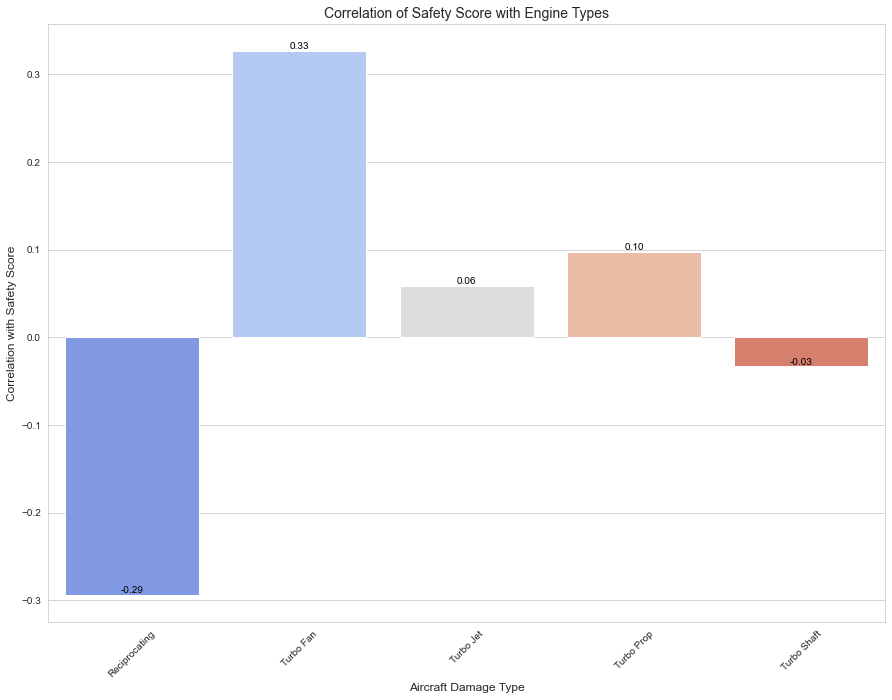

In [1183]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 11))
correlation_plot = sns.barplot(x=correlation_series.index, y=correlation_series.values, palette="coolwarm")

# Labeling the bars with their values
for index, value in enumerate(correlation_series.values):
    correlation_plot.text(index, value, 
                          f'{value:.2f}', # Format to 2 decimal places
                          ha='center', va='bottom', 
                          color='black', fontsize=10)

plt.xlabel('Aircraft Damage Type', fontsize=12)
plt.ylabel('Correlation with Safety Score', fontsize=12)
plt.title('Correlation of Safety Score with Engine Types', fontsize=14)
plt.xticks(rotation=45)
plt.show();

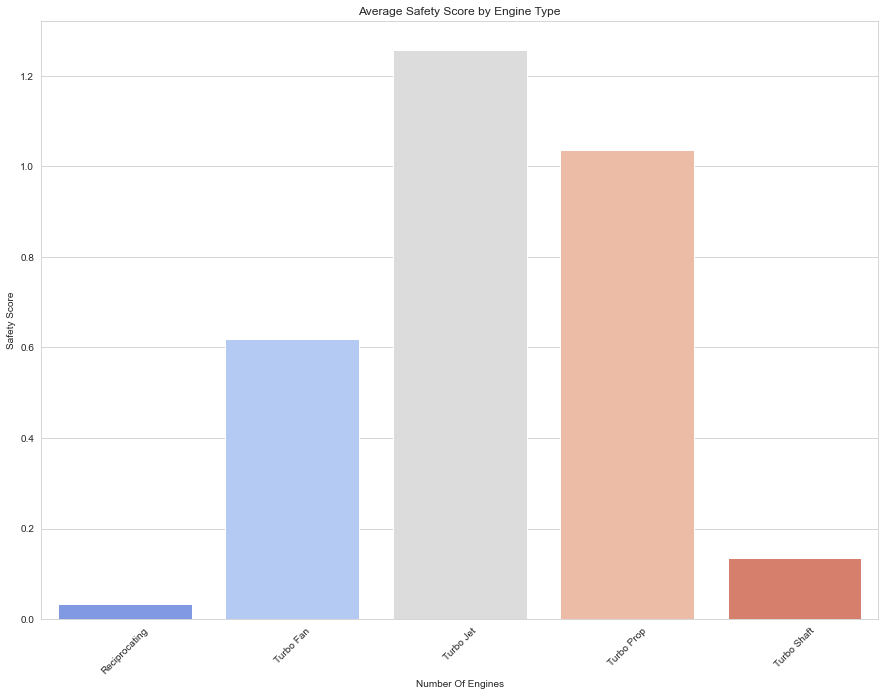

In [1193]:
mean_safety_score = destroyed_df.groupby('Engine Type')['Safety Score'].mean().reset_index()

plt.figure(figsize=(15, 11))
sns.barplot(data=mean_safety_score, x='Engine Type', y='Safety Score', palette='coolwarm')

# Setting the title and labels
plt.title('Average Safety Score by Engine Type')
plt.xlabel('Number Of Engines')
plt.ylabel('Safety Score')
plt.xticks(rotation=45)

# Displaying the plot
plt.show();

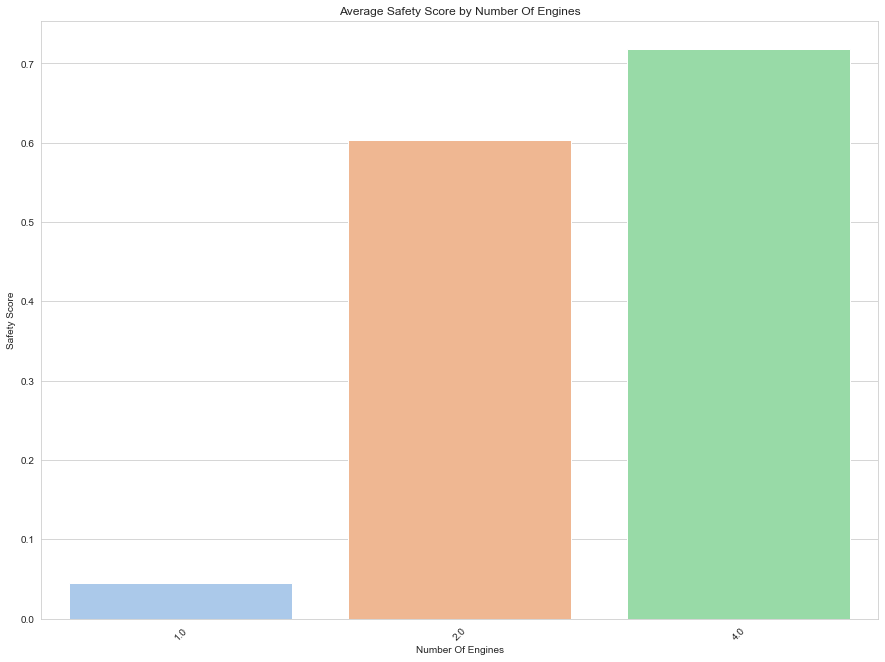

In [1184]:
mean_safety_score = destroyed_df.groupby('Number Of Engines')['Safety Score'].mean().reset_index()

plt.figure(figsize=(15, 11))
sns.barplot(data=mean_safety_score, x='Number Of Engines', y='Safety Score', palette="pastel")

# Setting the title and labels
plt.title('Average Safety Score by Number Of Engines')
plt.xlabel('Number Of Engines')
plt.ylabel('Safety Score')
plt.xticks(rotation=45)

# Displaying the plot
plt.show();

In [1185]:
avg_safety_scores = df_safety_score.groupby('Make Model')['Safety Score'].mean().reset_index()

# Sort by the safety score in ascending order and select the top 20
top_safest_makes = avg_safety_scores.sort_values(by='Safety Score', ascending=False).head(20)

top_safest_makes

,Make Model,Safety Score
15,dassaultfalcon900,4.500000
31,zenithstolch701,4.333333
13,cessna208caravan,4.333333
30,socatatbm,4.333333
25,rajhamsaxair,4.333333
24,quicksilvergt500,4.333333
3,atr42,4.250000
20,letl33solo,4.200000
2,airbusa380,4.166667
16,douglasdc8,4.142857


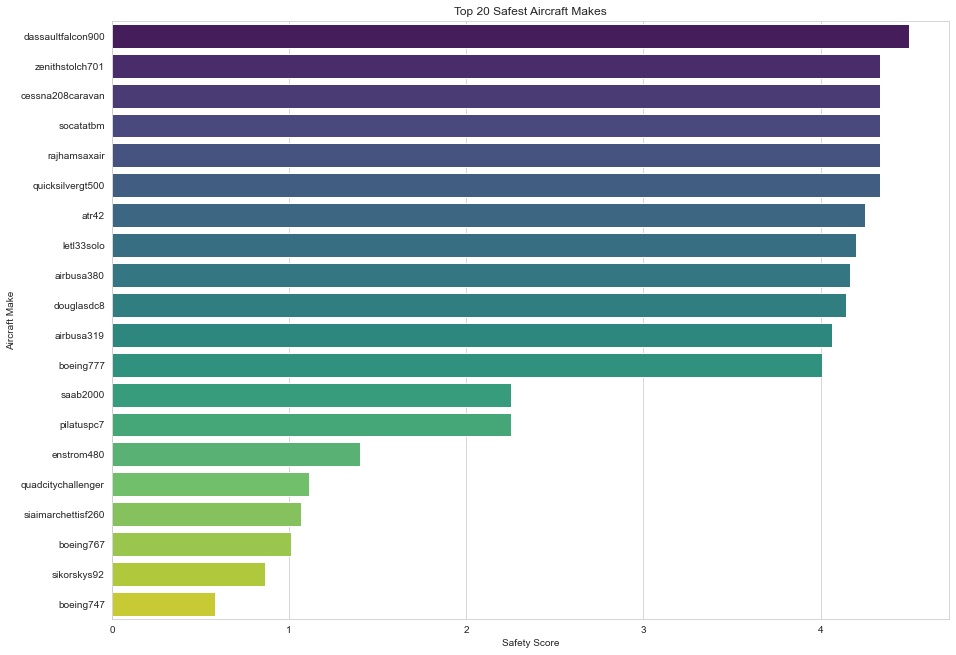

In [1186]:
plt.figure(figsize=(15, 11))
sns.barplot(data=top_safest_makes, x='Safety Score', y='Make Model', palette='viridis')
plt.title('Top 20 Safest Aircraft Makes')
plt.xlabel('Safety Score')
plt.ylabel('Aircraft Make')
plt.show();

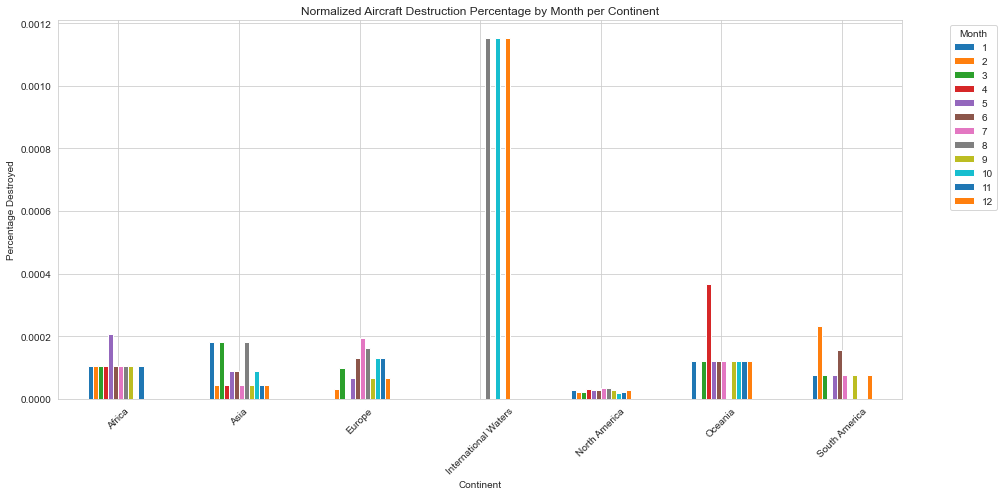

In [1187]:
destroyed_df.set_index('Event Date', inplace=True)

destroyed_data = destroyed_df[destroyed_df['Aircraft Damage'] == 'Destroyed']

monthly_continent_destruction = destroyed_data.groupby(['Continent', destroyed_data.index.month]).size()

# Now let's get the total number of aircraft built per continent
total_built_per_continent = destroyed_df.groupby('Continent')['nbBuilt'].sum()

# Calculate the normalized destruction rate by dividing the monthly destruction counts by the total built per continent
normalized_destruction_rate_continent = monthly_continent_destruction.div(total_built_per_continent, level='Continent')

normalized_destruction_rate_continent *= 100

# Unstack the Series to get a DataFrame where the index is 'Continent' and columns are months
destruction_rate_df = normalized_destruction_rate_continent.unstack(level=-1)

destruction_rate_df.plot(kind='bar', figsize=(14, 7), legend=True)

plt.xlabel('Continent')
plt.ylabel('Percentage Destroyed')
plt.title('Normalized Aircraft Destruction Percentage by Month per Continent')
plt.xticks(rotation=45)  
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')  


plt.tight_layout()
plt.show();

The chart indicates that flights over International Waters present a significantly higher risk compared to other regions, particularly North America which exhibits much lower percentages of destroyed incidents. A closer examination of the monthly data reveals that February, August, and October are months with heightened risk in International Waters. To gain a clearer understanding of aircraft safety, it is also beneficial to delve deeper into the data for North America.

To understand patterns in aircraft safety, I'll analyze the normalized accident rates by month. This will show me if there are specific times of the year that are more prone to accidents. Then, I'll look at the severity of accidents to determine if certain months not only have a higher frequency of accidents but also more severe outcomes. This two-pronged approach gives me a fuller picture of the risk associated with flying in different months. To further refine the data to suit our needs, I'll filter to only include events that occured after 1990 to get a clearer picture of recent trends. I will do so in several steps:

1. Filter the dataset to include only accidents that occured in the United States and from 1990 to the latest year in the dataset. 


2. The filtered dataset us_accidents is then grouped by month of the accident date, where the size of each group is calculated telling us the total number of accidents for each month accross all years since 1990. 


3. The span of years is calculated by subtracting the earliest year from the latest year (using .min() and .max() methods) and adding 1. 


4. The average number of accidents per month is calculated by dividing the total accidents for each month by the span of years. 


5. The average monthly accidents are normalized to sum up to 1. This is done by dividing each month's average accidents by the sum of all months' average accidents. 


6. Visualize the data. 

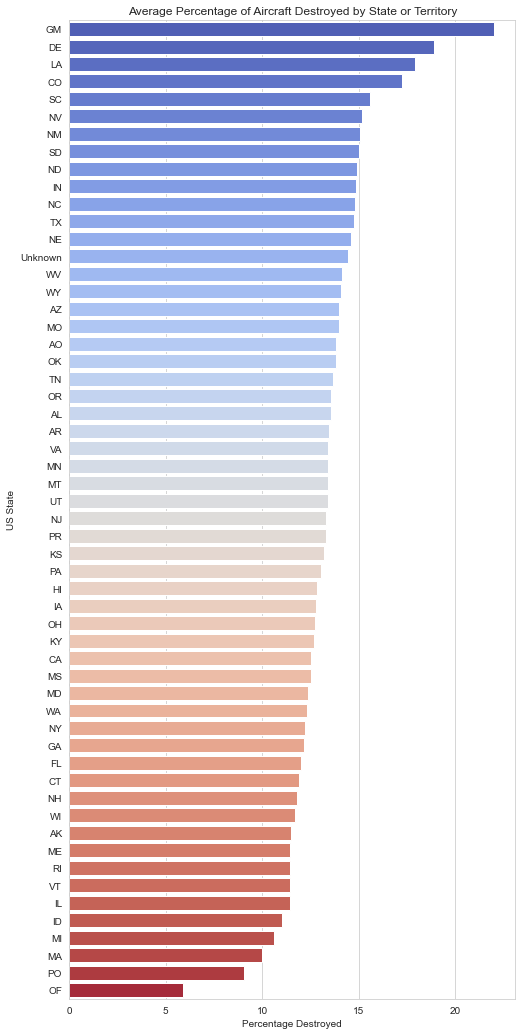

In [1188]:
# Filter the DataFrame for 'Destroyed' damage and calculate the count per state
destroyed_us = us_accidents[us_accidents['Aircraft Damage'] == 'Destroyed']
state_destroyed_counts = destroyed_us['State Abbreviation'].value_counts()

# Calculate the total count of accidents per state
state_total_counts = us_accidents['State Abbreviation'].value_counts()

# Group by 'Us State' and calculate the average 'Percentage Destroyed' 
state_percentage_destroyed_sorted = us_accidents.groupby('State Abbreviation')['Percentage Destroyed'].mean().sort_values(ascending=False)

# Plot the sorted data in a horizontal bar chart
plt.figure(figsize=(8, 18))
sns.barplot(x=state_percentage_destroyed_sorted.values, y=state_percentage_destroyed_sorted.index, palette="coolwarm")
plt.title('Average Percentage of Aircraft Destroyed by State or Territory')
plt.xlabel('Percentage Destroyed')
plt.ylabel('US State')
plt.show();

Examining the plot, it appears that the island territory of Guam exhibits a significantly higher percentage of destruction from aircraft accidents or incidents. This trend may be influenced by a variety of factors, including but not limited to more challenging flying conditions such as unpredictable weather, limited emergency landing locations, and potentially less available resources for aircraft maintenance and repair. 

## Recommendations

### Strategic Actions for Aviation Industry Entry

#### Aircraft Selection Strategy
- Develop a procurement plan that targets aircraft with top-tier safety ratings, giving special consideration to those with Turbo Fan engines due to their lower accident rates.

#### Pre-Operational Planning
- Establish operational guidelines that minimize instructional flights, which are often associated with higher accident frequencies.
- Design initial flight operations with a focus on domestic routes to avoid the complexities of international water crossings.

#### Safety Training Framework
- Create a comprehensive pilot training curriculum with an emphasis on over-water navigation and emergency procedures, prioritizing readiness for areas known to have challenging conditions.


### Pre-Launch Implementation Steps

#### Risk Management Preparation
- Begin a risk assessment program to analyze potential flight routes or types, preparing to implement mitigation strategies once operations commence.

#### Pilot Training Program Development
- Start designing training programs for pilots, including modules for navigating specific regional challenges and adverse weather conditions, such as those in tropical areas and during winter months.

#### Safety Standards Consultation
- Engage with aviation safety consultants to set up high safety standards, particularly for flights over international waters.
